In [102]:
import pandas as pd
import string
import matplotlib.pyplot as plt

# Besede in naglasi

Najprej preberemo seznam besed in naglašenih črk v besedah; te moramo nato pretvoriti v bolj oprijemljiv zapis.

Pri določanju zlogov poiščemo vse izolirane samoglasnike in jih proglasimo za svoj zlog. 
Samoglasniki, ki ne spadajo v ASCII, so poudarjeni (pri tem enako obravnamo tudi zlogotvorni _r_), ostali niso.

In [2]:
vse_besede = pd.read_csv("obdelani_podatki/besede.csv", names=["beseda", "poudarjena_beseda"])

In [3]:
vse_besede

,beseda,poudarjena_beseda
0,Pierre,Pierré
1,Pierra,Piérra
2,Pierrea,Pierréa
3,Pierru,Piérru
4,Pierreu,Pierréu
...,...,...
933101,zanj,zánj
933102,zanjo,zánjo
933103,zanju,zánju
933104,zanje,zánje


In [4]:
# Poiščimo vse črke v besedah, ki ne spadajo v ASCII
# Te potrebujemo, da lahko določimo, kaj je samoglasnik

def neznane_crke(beseda):
    return {x for x in beseda if ord(x) > 0x7f}

vse_neznanke = set()
for s in vse_besede['poudarjena_beseda'].apply(neznane_crke).values:
    vse_neznanke.update(s)

neznanke = "".join(vse_neznanke)
neznanke

'ÁµÖéšóĐŽÍČđüíĆäöŠčúćÚëÉŕÓáŔž'

In [5]:
def poudarjeni_zlogi(poudarjena_beseda):
    """Pretvori zapis s poudarjenimi znaki v zapis zlogov. Znak '-' pomeni poudarjen zlog, 'u' pa nepoudarjen.
        'zánju' -> '-u'
    """

    def je_samoglasnik(ch):
        return ch in 'aeiouAEIOUöëÁóÓŕÚŔúáÖÍíäüÉé'

    def je_poudarjen(samoglasnik):
        if len(samoglasnik) == 1:
            return samoglasnik not in "aeiou"
        else:
            return any(je_poudarjen(ch) for ch in samoglasnik)

    samoglasniki = []
    for i, ch in enumerate(poudarjena_beseda):
        if je_samoglasnik(ch):
            if i >= 1 and je_samoglasnik(poudarjena_beseda[i-1]):
                # samoglasnik ni izoliran
                samoglasniki[-1] += ch
            else:
                samoglasniki.append(ch)
    
    return "".join(map(lambda ch: '-' if je_poudarjen(ch) else 'u', samoglasniki))

vse_besede['zlogi'] = vse_besede.poudarjena_beseda.apply(poudarjeni_zlogi)
vse_besede

,beseda,poudarjena_beseda,zlogi
0,Pierre,Pierré,u-
1,Pierra,Piérra,-u
2,Pierrea,Pierréa,u-
3,Pierru,Piérru,-u
4,Pierreu,Pierréu,u-
...,...,...,...
933101,zanj,zánj,-
933102,zanjo,zánjo,-u
933103,zanju,zánju,-u
933104,zanje,zánje,-u


In [6]:
# Pripravimo si zgoščevalno tabelo besed in zlogov, da lahko v nadaljevanju hitreje opravimo analizo
besede_zlogi = {}
for beseda, zlog in zip(vse_besede.beseda, vse_besede.zlogi):
    besede_zlogi[beseda.lower()] = zlog
besede_zlogi

{'pierre': 'u-',
 'pierra': '-u',
 'pierrea': 'u-',
 'pierru': '-u',
 'pierreu': 'u-',
 'pierrom': 'uu',
 'pierreom': 'u-',
 'pierrov': '-u',
 'pierreov': 'u-',
 'pierroma': '-uu',
 'pierreoma': 'u-u',
 'pierrih': '-u',
 'pierreih': 'u-',
 'pierri': '-u',
 'pierrei': 'u-',
 'pierree': 'u-',
 'shakespeare': 'uu-u',
 'shakespeara': 'uu-u',
 'shakespearja': 'uu-u',
 'shakespearea': 'uuu-',
 'shakespeareja': 'uuu-u',
 'shakespearju': 'uu-u',
 'shakespearu': 'uu-u',
 'shakespeareu': 'uuu-',
 'shakespeareju': 'uuu-u',
 'shakespearjem': 'uu-u',
 'shakespearom': 'uu-u',
 'shakespeareom': 'uuuu',
 'shakespearejem': 'uuu-u',
 'shakespearjev': 'uuuu',
 'shakespearov': 'uu-u',
 'shakespeareov': 'uu-u',
 'shakespearejev': 'uuu-u',
 'shakespearjema': 'uuuuu',
 'shakespearoma': 'uu-uu',
 'shakespearejema': 'uuu-uu',
 'shakespeareoma': 'uuu-u',
 'shakespearih': 'uu-u',
 'shakespearjih': 'uu-u',
 'shakespeareih': 'uuu-',
 'shakespearejih': 'uuu-u',
 'shakespeari': 'uu-u',
 'shakespearji': 'uu-u',
 'sha

# Podatki

Sedaj preberemo podatke o virih, kategorijah in literarnih delih.

In [7]:
literarna_dela = pd.read_csv("obdelani_podatki/podatki.csv", names=["vir", "naslov", "avtor", "besedilo", "leto"])
literarna_dela

,vir,naslov,avtor,besedilo,leto
0,https://sl.wikisource.org/wiki/%22Grad%22_Turn...,"""Grad"" Turnska peč",Janko Orožen,"\nPod Tovstom je slikovita in ozka soteska, ki...",-1
1,https://sl.wikisource.org/wiki/%22Grad%22_na_D...,&quot;Grad&quot; na Dobrovlju,Janko Orožen,\nNa težko dostopnem vrhu Dobrovlja je stal ne...,-1
2,https://sl.wikisource.org/wiki/%22Grad%22_na_M...,&quot;Grad&quot; na Marnem,Janko Orožen,"\nOb cesti, ki vodi pod Marnim na Dol, je kape...",-1
3,https://sl.wikisource.org/wiki/%22Grad%22_na_V...,"""Grad"" na Vipoti",Janko Orožen,\nVipota! Kdo je ne pozna! S svojo piramidasto...,-1
4,https://sl.wikisource.org/wiki/%22Pisarska%22_...,"""Pisarska"" praviš",Stanko Vraz,"\n""Pisarska"", praviš, ""reč je ničemurna:\n\nde...",1952
...,...,...,...,...,...
14737,https://sl.wikisource.org/wiki/%E2%80%9EGrad%E...,„Grad“ v Skalah,Janko Orožen,\nNekoč se je širilo jezero od Gradišča do Ška...,-1
14738,https://sl.wikisource.org/wiki/%E2%80%9ESlov._...,"„Slov. plan. društvo"" z ozirom na naše narodno...",Ivan Vdovič,"Krasna je zemlja slovenska. Na mejah, ki dele ...",1895
14739,https://sl.wikisource.org/wiki/%E2%80%9EZur_Pf...,"""Zur pflege der slovensichen Schriftsprache an...",NaN,"Von Franz Žnideršič,\nk. k. Professor. Gorz. D...",1903
14740,https://sl.wikisource.org/wiki/%E2%80%A0Ivan_%...,†Ivan Škrjanec,NaN,"V petek, dne 17. julija je umrl v\nrodni hiši ...",1903


In [8]:
viri = pd.read_csv("obdelani_podatki/viri.csv", names=["povezava", "tip"])
viri

,povezava,tip
0,https://sl.wikisource.org/wiki/%22Grad%22_Turn...,knjiga
1,https://sl.wikisource.org/wiki/%22Grad%22_na_V...,knjiga
2,https://sl.wikisource.org/wiki/%22%C5%A0tok%22...,knjiga
3,https://sl.wikisource.org/wiki/A._Pretnarjevih...,poezija
4,https://sl.wikisource.org/wiki/Abecedni_seznam...,ljudsko slovstvo
...,...,...
625,https://sl.wikisource.org/wiki/%C5%BDolcpa%C5%...,zbrano delo
626,https://sl.wikisource.org/wiki/%C5%BDupanova_M...,antikvarno gradivo
627,https://sl.wikisource.org/wiki/%C5%BDivotopis_...,separat
628,https://sl.wikisource.org/wiki/%C5%BDolcpa%C5%...,zbrano delo


In [10]:
# Definiramo pomožne funkcije za pripravo pretvorbe besedil v zaporedje zlogov
def standardiziraj_whitespace(besedilo):
    besedilo = "".join(" " if ch.isspace() else ch for ch in besedilo)
    while "  " in besedilo:
        besedilo = besedilo.replace("  ", " ")
    return besedilo.strip()

def pripravi_besedilo(besedilo):
    """Odstrani vse nečrkovne in ne-whitespace znake, ter standardiziraj whitespace"""
    sprejeti_znaki = string.ascii_letters + neznanke + " "
    besedilo = standardiziraj_whitespace(besedilo)
    return "".join(ch for ch in besedilo if ch in sprejeti_znaki)

In [11]:
def pretvori_v_zloge(pripravljeno_besedilo):
    """Pretvori besedilo v zaporedje zlogov. V zaporedju ne ohranimo mej med besedami."""
    besede = pripravljeno_besedilo.split()
    zlogi = ""
    for beseda in besede:
        if beseda.lower() in besede_zlogi:
            zlogi += besede_zlogi[beseda.lower()]
        else:
            # če besede slučajno ni, obstaja možnost, da je zapisana s poudarjenimi zlogi
            # takrat jih interpoliramo na mestu
            # sicer bo funkcija vrnila same nepoudarjene zloge, kar ni optimalno, ampak
            # glede tega ne moramo narediti ravno veliko
            zlogi += poudarjeni_zlogi(beseda.lower())
    return zlogi

literarna_dela["zaporedje_zlogov"] = literarna_dela.besedilo.apply(lambda s: pretvori_v_zloge(pripravi_besedilo(s)))
literarna_dela
# ta celica se izvaja malce dlje časa (~80 sekund)

,vir,naslov,avtor,besedilo,leto,zaporedje_zlogov
0,https://sl.wikisource.org/wiki/%22Grad%22_Turn...,"""Grad"" Turnska peč",Janko Orožen,"\nPod Tovstom je slikovita in ozka soteska, ki...",-1,uuu-uu-uu-uu-uuuuu-uu-u-u-u-u-u-u-u-u-uu-u-u-u...
1,https://sl.wikisource.org/wiki/%22Grad%22_na_D...,&quot;Grad&quot; na Dobrovlju,Janko Orožen,\nNa težko dostopnem vrhu Dobrovlja je stal ne...,-1,u-uu-u-uuuu--u-u-u-u---u-uuu-uu-uu-uuu-uu----u...
2,https://sl.wikisource.org/wiki/%22Grad%22_na_M...,&quot;Grad&quot; na Marnem,Janko Orožen,"\nOb cesti, ki vodi pod Marnim na Dol, je kape...",-1,-u-u-uuuuu--u-uu-u-u-uu-u--u--u-u-u-u--uu-uuuu...
3,https://sl.wikisource.org/wiki/%22Grad%22_na_V...,"""Grad"" na Vipoti",Janko Orožen,\nVipota! Kdo je ne pozna! S svojo piramidasto...,-1,uuu---u--uuu-uuu-u-uu-u-uuuuu-u--uuu-uuu---u-u...
4,https://sl.wikisource.org/wiki/%22Pisarska%22_...,"""Pisarska"" praviš",Stanko Vraz,"\n""Pisarska"", praviš, ""reč je ničemurna:\n\nde...",1952,uuu-u--uuuuu-u-u-uuuuu---u-uu-uu-uuu--u-u-u--u...
...,...,...,...,...,...,...
14737,https://sl.wikisource.org/wiki/%E2%80%9EGrad%E...,„Grad“ v Skalah,Janko Orožen,\nNekoč se je širilo jezero od Gradišča do Ška...,-1,u-u--uuuuuuu-uu--uuu-u-uu-uu-uuu-u--uu--uuu-uu...
14738,https://sl.wikisource.org/wiki/%E2%80%9ESlov._...,"„Slov. plan. društvo"" z ozirom na naše narodno...",Ivan Vdovič,"Krasna je zemlja slovenska. Na mejah, ki dele ...",1895,u---uu-uu-uu-uu-uu-uu-uuuuuuu-uu-uuuu-uu-u-uu-...
14739,https://sl.wikisource.org/wiki/%E2%80%9EZur_Pf...,"""Zur pflege der slovensichen Schriftsprache an...",NaN,"Von Franz Žnideršič,\nk. k. Professor. Gorz. D...",1903,u-uuuuuu-uu-uuu-uuuu--uuuu-uu-u-uuuuu-u-u-u-u-...
14740,https://sl.wikisource.org/wiki/%E2%80%A0Ivan_%...,†Ivan Škrjanec,NaN,"V petek, dne 17. julija je umrl v\nrodni hiši ...",1903,-u-u-u-u--u-uuuu-uuuu-u---uuuu-u-u-uu--uu---u-...


# Analiza

Za začetek si poglejmo dolžino zbranih del.
Mera za dolžino bo pravzaprav število zlogov v delu; ta se bo namreč bolj ujemala z nadaljnjo analizo.

<AxesSubplot:>

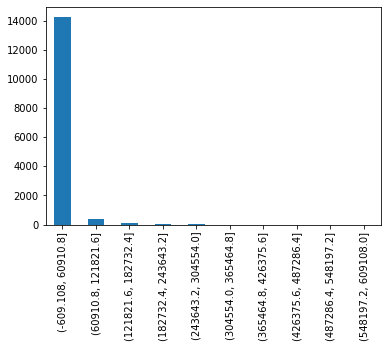

In [109]:
vir_naslov_zlogi = literarna_dela[["vir", "naslov", "zaporedje_zlogov", "leto", "avtor"]].copy()
vir_naslov_zlogi["st_nepoudarjenih"] = vir_naslov_zlogi.zaporedje_zlogov.apply(lambda s: s.count("u"))
vir_naslov_zlogi["st_poudarjenih"] = vir_naslov_zlogi.zaporedje_zlogov.apply(lambda s: s.count("-"))

dolzina = vir_naslov_zlogi.st_nepoudarjenih + vir_naslov_zlogi.st_poudarjenih
dolzina.groupby(pd.cut(dolzina, 10)).size().plot.bar()

<AxesSubplot:>

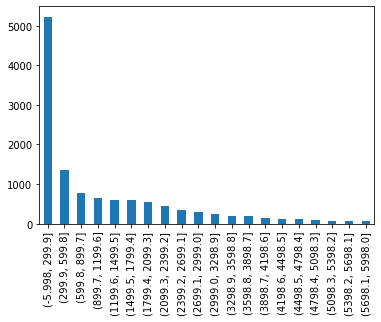

In [110]:
krajsi = dolzina[dolzina < 6000]
krajsi.groupby(pd.cut(krajsi, 20)).size().plot.bar()

<AxesSubplot:>

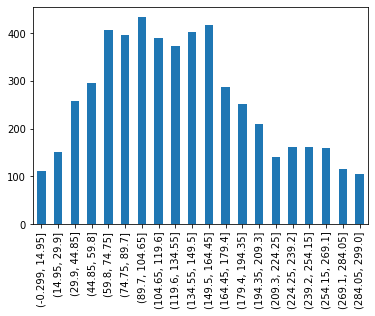

In [111]:
krajsi = dolzina[dolzina < 300]
krajsi.groupby(pd.cut(krajsi, 20)).size().plot.bar()

Velik del zbranih del je torej relativno kratkih; več kot tretjina del je krajših od 300 zlogov.
Med temi deli je nekaj več variacije, zelo kratkih del ni veliko.
Število daljših del pada z njihovo dolžino, kar je pričakovano.

In [112]:
del dolzina, krajsi

## Število zlogov

Prvo vprašanje se nanaša na medsebojno razmerje med številom poudarjenih in nepoudarjenih zlogov v besedilu.
Večina besed je sestavljena iz več kot enega zloga; dva poudarjena zloga se redko pojavita skupaj.
Iz tega sklepamo, da bo nepoudarjenih zlogov večinoma več kot poudarjenih.
Poleg tega vemo, da je veliko poezije napisano ritmično, v neki stopici; ta zahteva neko minimalno količino poudarjenih zlogov.
Po drugi strani je ostalo leposlovje manj strogo glede fonetike, pričakujemo, da bodo dela vsebovala več daljših besed, ter imele posledično manj poudarjenih zlogov (gledano relativno na vse zloge).
Najmanj poudarjenih zlogov pričakujemo od neleposlovnih del, ki imajo najmanj tovrstnih omejitev.

Obstaja pomembna izjema k zgornjemu razmišljanju.
Nekatere bolj moderne oblike poezije se popolnoma izognejo klasični poezijski obliki, kar pomeni tudi, da se ne držijo stopice.
Če podobno velja za ostala moderna besedila, bi pričakovali, da se je število poudarjenih zlogov s časom zniževalo.

Hipoteze za ta del so naslednje:
- večina literarnih del ima več poudarjenih zlogov kot nepoudarjenih
- leposlovna dela imajo večji del zlogov poudarjen od neleposlovnih
- izmed leposlovnih del ima poezija največji delež poudarjenih zlogov
- bolj moderna besedila imajo manjši delež poudarjenih zlogov kot starejša besedila

In [113]:
# zelo kratka besedila nas ne zanimajo
zanimivi = vir_naslov_zlogi[vir_naslov_zlogi.st_poudarjenih + vir_naslov_zlogi.st_nepoudarjenih > 10].copy()
zanimivi["razmerje"] = zanimivi.st_poudarjenih / (zanimivi.st_nepoudarjenih + zanimivi.st_poudarjenih)
zanimivi.sort_values(by="razmerje")

,vir,naslov,zaporedje_zlogov,leto,avtor,st_nepoudarjenih,st_poudarjenih,razmerje
591,https://sl.wikisource.org/wiki/Blabla,Blabla,-uuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu...,-1,Boris A. Novak,56,5,0.081967
10094,https://sl.wikisource.org/wiki/Sedmo_pismo_F._...,"Sedmo pismo Franceta Prešerna Stanku Vrazu, Lj...",uuuu-uu-uuuuuuuuuuuuu-uuuuuu-uuuu-uuuuuuuuuuuu...,1833,France Prešeren,411,44,0.096703
12916,https://sl.wikisource.org/wiki/Vorred,"TA CELI CATEHISMUS, ENI PSALMI, INU TEH VEKSHI...",--uuuuu-u-uuu-uu-uu-uu-uuuuuuuuuuuuuuu-uuuuuuu...,1584,Jurij Dalmatin,118,14,0.106061
866,https://sl.wikisource.org/wiki/Bri%C5%BEinski_...,II. brižinski spomenik,u-u-uuuuuuuuuu-u-uuuuu-uuuuuu-uuuuuuuuuuuu-uuu...,2007,neznani avtor,711,85,0.106784
2530,https://sl.wikisource.org/wiki/II._bri%C5%BEin...,II. brižinski spomenik,u-u-uuuuuuuuuu-u-uuuuu-uuuuuu-uuuuuuuuuuuu-uuu...,2007,neznani avtor,711,85,0.106784
...,...,...,...,...,...,...,...,...
3596,"https://sl.wikisource.org/wiki/Kar_je,_be%C5%BEi","Kar je, beži",--u-----u-u-uuu----u-u--,-1,France Prešeren,8,16,0.666667
3204,https://sl.wikisource.org/wiki/KLIP_KLOP,SREDI DOMOVINE. - V čolnu posedajo,u-u-u-u--u-u------u-u-----u-u--,1953,Anica Černej,10,21,0.677419
3771,https://sl.wikisource.org/wiki/Klip_klop,SREDI DOMOVINE. - V čolnu posedajo,u-u-u-u--u-u------u-u-----u-u--,1953,Anica Černej,10,21,0.677419
879,https://sl.wikisource.org/wiki/Br%C5%BE_domov,Brž domov,-u-u----u-u----u-u----u-u--u,-1,Neža Maurer,9,19,0.678571


In [114]:
len(zanimivi)

14649

In [115]:
len(zanimivi[zanimivi.razmerje < 0.5]) / len(zanimivi)

0.943682162604956

Velika večina dovolj dolgih besedil ima torej več nepoudarjenih zlogov kot poudarjenih. 
S tem smo potrdili prvo hipotezo.
Naslednja hipoteza je, da imajo leposlovna besedila več poudarjenih zlogov kot neleposlovna, ter da ima poezija izmed prvih največje razmerje, ker se vsaj starejša večinoma držijo stopice; ta pa zahteva neko minimalno razmerje (npr. jamb 1:1, amfibrah 1:2, itd.). 
Zgodbe, romani in podobna druga dela pa dovoljujejo daljše besede, ki imajo lahko tudi več nepoudarjenih zlogov.

Podatkov o tipih je zelo malo (podatki so na voljo le za 630 del izmed več kot 14 tisočih), torej ta del ni zanesljiv.

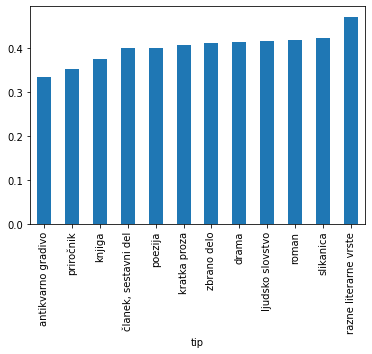

In [116]:
vrste = pd.merge(zanimivi, viri, left_on="vir", right_on="povezava").groupby("tip")
r = vrste.razmerje.count()
vrste.razmerje.mean()[r>5].sort_values().plot.bar()
del r, vrste

Rezultat je do neke mere pričakovan, do neke pa ne. 
Antikvarna dela, priročniki, knjige in članki so neleposlovna dela, in imajo res manjše razmerje kot leposlovna. 
Med preostalimi deli pa je poezija imela ravno najmanjše razmerje, kar je v popolnem nasprotju s hipotezo.

Poglejmo si še rezultate glede na letnico izdaje.

<AxesSubplot:>

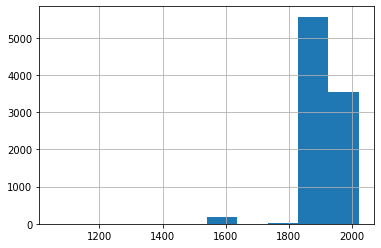

In [117]:
zanimivi_z_letnico = zanimivi[zanimivi.leto > -1]
zanimivi_z_letnico.leto.hist()

Velika večina del z označeno letnico izhaja iz poznega 19. ali zgodnjega 20. stoletja.
Nekaj del je tudi iz več sto let pred tem; teh ne moramo zanesljivo analizirati, ker se je jezik od tedaj že toliko spremenil, da veliko njihovih besed ni v slovarju poudarjenih zlogov.

<AxesSubplot:>

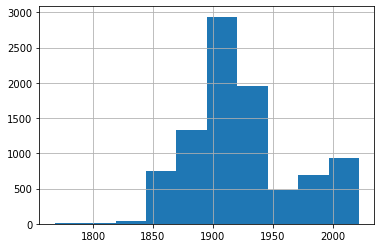

In [118]:
zanimivi_z_letnico = zanimivi[zanimivi.leto > 1750]
zanimivi_z_letnico.leto.hist()

In [119]:
len(zanimivi_z_letnico)

9152

<AxesSubplot:xlabel='leto'>

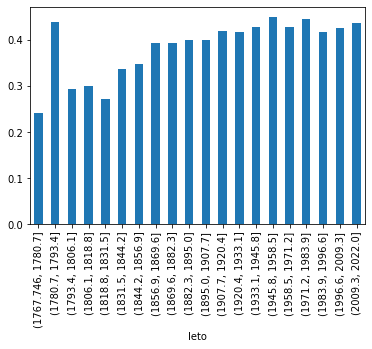

In [120]:
zanimivi_z_letnico.groupby(pd.cut(zanimivi_z_letnico.leto, 20)).razmerje.mean().plot.bar()

Vrednosti nekaj časa naraščajo, nato pa se navidez stabilizirajo nekje v prvi polovici prejšnjega stoletja.
To še ne pomeni, da se je razmerje v vseh objavljenih delih do tedaj dejansko povečevalo; možno je, da je večina starejših del drugačne vrste (npr. vsebuje manj leposlovnih del) kot novejša dela.
Rezultat pa v vsakem primeru ovrže postavljeno hipotezo.

In [121]:
del zanimivi, zanimivi_z_letnico

## Vrsta stopice

Naslednji del analize bo gledal najpogostejšo vrsto stopice v besedilih.

Stopica je vnapej določeno zaporedje poudarjenih/nepoudarjenih zlogov. Pri tej analizi se bomo omejili na naslednje:
- u- (jamb)
- -u (trohej)
- -uu (daktil)
- u-u (amfibrah)

Te so, glede na [vir](https://sl.wikipedia.org/wiki/Stopica), najbolj primerne za slovenski jezik.

Stopice bomo v posamičnem delu prešteli ločeno; najprej preštejemo, koliko ima jambov, nato preštejemo število trohejev v celotnem besedilu, nato število daktilov in na koncu število amfibrahov.
Dobljeno število jambov bo tako vedno večje (ali enako) kot število amfibrahov, ker je jamb vsebovan v amfibrahu. 
Podobno velja tudi za nekatere druge kombinacije stopic.

Naša hipoteza je, da bo večina del imela približno enakomerno razporeditev stopic, razen poezije, kjer bo količina ene stopice izstopala.
Sklepamo tudi, da se razporeditev ni bistveno spreminjala skozi čas.

In [122]:
def prestej_stopico(besedilo, stopica):
    return besedilo.count(stopica)

vir_naslov_zlogi["jamb"] = vir_naslov_zlogi.zaporedje_zlogov.apply(lambda s: prestej_stopico(s, "u-"))
vir_naslov_zlogi["trohej"] = vir_naslov_zlogi.zaporedje_zlogov.apply(lambda s: prestej_stopico(s, "-u"))
vir_naslov_zlogi["daktil"] = vir_naslov_zlogi.zaporedje_zlogov.apply(lambda s: prestej_stopico(s, "-uu"))
vir_naslov_zlogi["amfibrah"] = vir_naslov_zlogi.zaporedje_zlogov.apply(lambda s: prestej_stopico(s, "u-u"))

vir_naslov_zlogi

,vir,naslov,zaporedje_zlogov,leto,avtor,st_nepoudarjenih,st_poudarjenih,jamb,trohej,daktil,amfibrah
0,https://sl.wikisource.org/wiki/%22Grad%22_Turn...,"""Grad"" Turnska peč",uuu-uu-uu-uu-uuuuu-uu-u-u-u-u-u-u-u-u-uu-u-u-u...,-1,Janko Orožen,71,47,41,41,19,28
1,https://sl.wikisource.org/wiki/%22Grad%22_na_D...,&quot;Grad&quot; na Dobrovlju,u-uu-u-uuuu--u-u-u-u---u-uuu-uu-uu-uuu-uu----u...,-1,Janko Orožen,114,89,64,64,31,37
2,https://sl.wikisource.org/wiki/%22Grad%22_na_M...,&quot;Grad&quot; na Marnem,-u-u-uuuuu--u-uu-u-u-uu-u--u--u-u-u-u--uu-uuuu...,-1,Janko Orožen,75,48,36,37,18,20
3,https://sl.wikisource.org/wiki/%22Grad%22_na_V...,"""Grad"" na Vipoti",uuu---u--uuu-uuu-u-uu-u-uuuuu-u--uuu-uuu---u-u...,-1,Janko Orožen,396,274,210,210,106,121
4,https://sl.wikisource.org/wiki/%22Pisarska%22_...,"""Pisarska"" praviš",uuu-u--uuuuu-u-u-uuuuu---u-uu-uu-uuu--u-u-u--u...,1952,Stanko Vraz,86,63,47,46,19,24
...,...,...,...,...,...,...,...,...,...,...,...
14737,https://sl.wikisource.org/wiki/%E2%80%9EGrad%E...,„Grad“ v Skalah,u-u--uuuuuuu-uu--uuu-u-uu-uu-uuu-u--uu--uuu-uu...,-1,Janko Orožen,790,536,422,422,226,247
14738,https://sl.wikisource.org/wiki/%E2%80%9ESlov._...,"„Slov. plan. društvo"" z ozirom na naše narodno...",u---uu-uu-uu-uu-uu-uu-uuuuuuu-uu-uuuu-uu-u-uu-...,1895,Ivan Vdovič,951,524,454,453,263,297
14739,https://sl.wikisource.org/wiki/%E2%80%9EZur_Pf...,"""Zur pflege der slovensichen Schriftsprache an...",u-uuuuuu-uu-uuu-uuuu--uuuu-uu-u-uuuuu-u-u-u-u-...,1903,NaN,164,69,59,59,40,38
14740,https://sl.wikisource.org/wiki/%E2%80%A0Ivan_%...,†Ivan Škrjanec,-u-u-u-u--u-uuuu-uuuu-u---uuuu-u-u-uu--uu---u-...,1903,NaN,215,127,105,106,54,67


In [123]:
zanimivi = vir_naslov_zlogi[vir_naslov_zlogi.st_poudarjenih + vir_naslov_zlogi.st_nepoudarjenih > 100].copy()

# Poglejmo si, če je število jambov kje bistveno drugačno kot število trohejev
len(zanimivi[abs(zanimivi.jamb - zanimivi.trohej) > 1])

0

To dejstvo ni presenetljivo; pove pa nam, da bo izračunano razmerje med trizložno in dvozložno stopico približno enako, ne glede na to, katero dvozložno stopico vzamemo.

In [124]:
zanimivi["rdaktil"] = zanimivi.daktil / zanimivi.jamb
zanimivi["ramfibrah"] = zanimivi.amfibrah / zanimivi.jamb

In [125]:
zanimivi.sort_values(by="rdaktil")

,vir,naslov,zaporedje_zlogov,leto,avtor,st_nepoudarjenih,st_poudarjenih,jamb,trohej,daktil,amfibrah,rdaktil,ramfibrah
10312,https://sl.wikisource.org/wiki/Slava_delu,Slava delu! Slavnostna himna ob petindvajsetle...,--u---u-uu-u-u-u-u-u-u-u-uu--u-u----u-uuuu-u--...,1909,Engelbert Gangl,77,91,66,66,7,30,0.106061,0.454545
10313,https://sl.wikisource.org/wiki/Slava_delu!,Slava delu! Slavnostna himna ob petindvajsetle...,--u---u-uu-u-u-u-u-u-u-u-uu--u-u----u-uuuu-u--...,1909,Engelbert Gangl,77,91,66,66,7,30,0.106061,0.454545
10341,https://sl.wikisource.org/wiki/Slava_delu!,Slava delu! Slavnostna himna ob petindvajsetle...,--u---u-uu-u-u-u-u-u-u-u-uu--u-u----u-uuuu-u--...,1909,Engelbert Gangl,77,91,66,66,7,30,0.106061,0.454545
10314,https://sl.wikisource.org/wiki/Slava_delu!_Sla...,Slava delu! Slavnostna himna ob petindvajsetle...,--u---u-uu-u-u-u-u-u-u-u-uu--u-u----u-uuuu-u--...,1909,Engelbert Gangl,77,91,66,66,7,30,0.106061,0.454545
12932,https://sl.wikisource.org/wiki/Vpra%C5%A1anje_...,Vprašanje,u-u-u-u-u-uu-uu-----u-u-u-u-u-u-u-u---u-u--u-u...,1975,Anica Černej,63,72,55,54,6,25,0.109091,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12916,https://sl.wikisource.org/wiki/Vorred,"TA CELI CATEHISMUS, ENI PSALMI, INU TEH VEKSHI...",--uuuuu-u-uuu-uu-uu-uu-uuuuuuuuuuuuuuu-uuuuuuu...,1584,Jurij Dalmatin,118,14,11,12,10,9,0.909091,0.818182
6405,https://sl.wikisource.org/wiki/Nekrolog_(Valen...,Nekrolog (Valentin Vodnik),uuuu-uuuuuuuuuuuuu-uuuuu-uuuuu-u-uuuuuuuuuuuuu...,1819,anonimno,988,149,129,129,118,103,0.914729,0.798450
1064,https://sl.wikisource.org/wiki/DRVGA_MOLITOV_L...,"TA CELI CATEHISMUS, ENI PSALMI, INU TEH VEKSHI...",-uuuuuuuu-uuuuuuuuuuuuuu-uu-uuuuuuuuuu-uuuuuuu...,1584,Jurij Dalmatin,146,29,24,25,22,21,0.916667,0.875000
1063,https://sl.wikisource.org/wiki/DRVGA_MOLITOV,"TA CELI CATEHISMUS, ENI PSALMI, INU TEH VEKSHI...",-uuuuuuuu-uuuuuuuuuuuuuu-uu-uuuuuuuuuu-uuuuuuu...,1584,Jurij Dalmatin,146,29,24,25,22,21,0.916667,0.875000


In [126]:
zanimivi.sort_values(by="ramfibrah")

,vir,naslov,zaporedje_zlogov,leto,avtor,st_nepoudarjenih,st_poudarjenih,jamb,trohej,daktil,amfibrah,rdaktil,ramfibrah
10268,https://sl.wikisource.org/wiki/Skrivnost1,Skrivnost,-uu-u--uu--uuu---u---uuu---u---u--u--uu--uu-u-...,1903,Josip Vandot,50,56,30,30,14,8,0.466667,0.266667
8355,https://sl.wikisource.org/wiki/Pogovor_dveh_Sl...,Pogovor dveh Slovencov,--u-u-uuuuuuuuu--u-u-u--uuu-u--uuuuuu-uuu----u...,-1,Peter Hitzinger,51,51,25,25,10,7,0.400000,0.280000
8102,https://sl.wikisource.org/wiki/Pismo_(Lojze_Gr...,Pismo,-uu--u--uu-u--uu--uuu-u--u-u-uu-uu-uu--uu--u--...,2011,Lojze Grozde,55,56,34,34,19,11,0.558824,0.323529
11768,https://sl.wikisource.org/wiki/Topal%C4%8Dikov,Topalčikov,uu-uuuuuuu-uuu--uu-u-u-uuu--u--u--u-----u-u-uu...,-1,Tomaž Šalamun,56,70,33,33,14,11,0.424242,0.333333
9364,https://sl.wikisource.org/wiki/Prostost_srca,Prostost srca,---u-u-u-u--u---u---u-u-u-u--u-uu-----u--uu--u...,-1,Malica Gomilšek,43,62,33,33,7,11,0.212121,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,https://sl.wikisource.org/wiki/Lete%C4%8Da_pre...,Čaroznanke,uuuuuuuuuuuuuuuuuuu---u-uu-uu-uu-uu-uu-uu-uu-u...,1990,Bina Štampe Žmavc,81,27,23,23,19,19,0.826087,0.826087
7093,https://sl.wikisource.org/wiki/Obupanec,Obupanec,u-uu-uu-uu-uu-uu-uu-u--uu-uu-uu-uu-uu-uu-uu-uu...,-1,Simon Jenko,65,40,35,35,28,30,0.800000,0.857143
7094,https://sl.wikisource.org/wiki/Obupanec_(Jenko),Obupanec,u-uu-uu-uu-uu-uu-uu-u--uu-uu-uu-uu-uu-uu-uu-uu...,-1,Simon Jenko,65,40,35,35,28,30,0.800000,0.857143
1063,https://sl.wikisource.org/wiki/DRVGA_MOLITOV,"TA CELI CATEHISMUS, ENI PSALMI, INU TEH VEKSHI...",-uuuuuuuu-uuuuuuuuuuuuuu-uu-uuuuuuuuuu-uuuuuuu...,1584,Jurij Dalmatin,146,29,24,25,22,21,0.916667,0.875000


Zelo malo del ima razmerji večji od ali blizu 1; ta dela so večinoma izjeme k načinu določevanja poudarjenosti zlogov (so ali starejša ali sploh ne slovenska).
Robni primeri torej ne bodo imeli bistvenega vpliva na nadaljno analizo.

Prvo si poglejmo, kakšna je distribucija obeh razmerij.

<AxesSubplot:xlabel='rdaktil'>

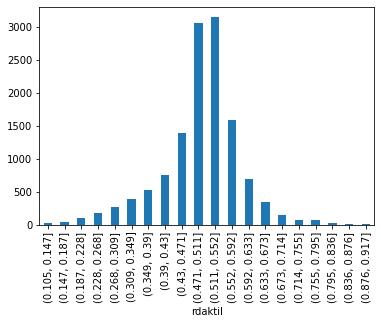

In [127]:
obicajen_daktil = zanimivi[zanimivi.rdaktil < 1]
obicajen_daktil.groupby(pd.cut(obicajen_daktil.rdaktil, 20)).vir.count().plot.bar()

<AxesSubplot:xlabel='ramfibrah'>

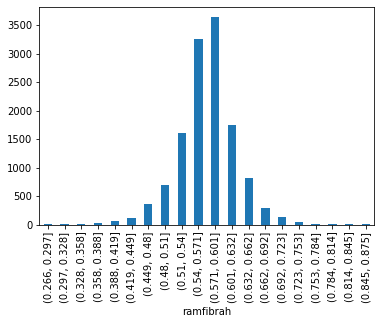

In [128]:
zanimivi.groupby(pd.cut(zanimivi.ramfibrah, 20)).vir.count().plot.bar()

In [129]:
zanimivi.rdaktil.std()

0.0940844165317616

In [130]:
zanimivi.ramfibrah.std()

0.05163179295148631

Amfibrah so torej v besedilih pojavlja pogosteje kot daktil; kar ni presenetljivo.
Da bi se daktil ne štel tudi kot amfibrah, mora biti bodisi na začetku, bodisi tik za dvojnim poudarjenim zlogom.
Ker slednji niso pogosti v slovenščini, bo skoraj vedno amfibrah štet vsaj tolikokrat kot daktil.
Dejstvo, da sta vrhova razporeditev na skoraj istem mestu, pa nam pove, da se v večini del zaporedje zlogov _-u-_ pojavlja redko.

Zanimivo je, da je standardna deviacija v razmerju daktilov večja od standardne deviacije v razmerju amfibrahov.
Iz grafa je razvidno, da večina te povečane deviacije izvira iz del, ki imajo podpovprečno razmerje daktila.

<AxesSubplot:xlabel='razlika'>

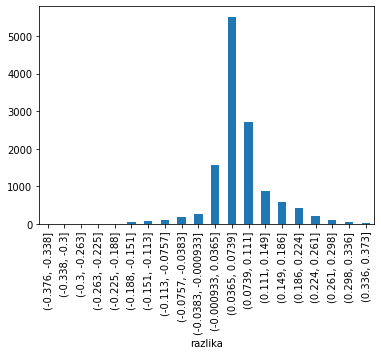

In [177]:
zanimivi["razlika"] = zanimivi.ramfibrah - zanimivi.rdaktil
zanimivi.groupby(pd.cut(zanimivi.razlika, 20)).size().plot.bar()

<AxesSubplot:xlabel='tip'>

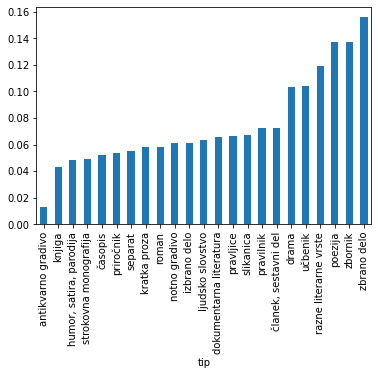

In [132]:
zanimivi_vir = zanimivi.merge(viri, left_on="vir", right_on="povezava")
zanimivi_vir.groupby("tip").razlika.median().sort_values().plot.bar()

Ponovno opozorimo, da je podatkov za tip vira malo in zato ta analiza ni nujno reprezentativna vsem podatkom.
Dani podatki o tipu pa sugerirajo, da bi lahko hipoteza bila pravilna. 
Poezija ima res večje razmerje med amfibrahom in daktilom kot večina drugih literarnih vrst; izjema so zborniki in zbrana dela.
Tako zbornik kot zbrano delo lahko med drugim vsebujeta tudi poezijo.

<AxesSubplot:xlabel='leto'>

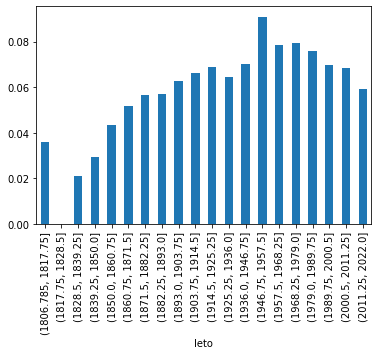

In [133]:
moderni = zanimivi[zanimivi.leto > 1800]
moderni.groupby(pd.cut(moderni.leto, 20)).razlika.median().plot.bar()

V grafu izstopa desetletje 1946-1957, v katerem je razlika razmerij nepričakovano visoka.
V tistem obdobju se pojavi veliko del z razliko razmerij blizu 0.2, ta dela pa so večinoma poezijska.
Podoben pojav se zgodi tudi v naslednjih nekaj desetljetjih, vendar je manj izrazit.

<AxesSubplot:>

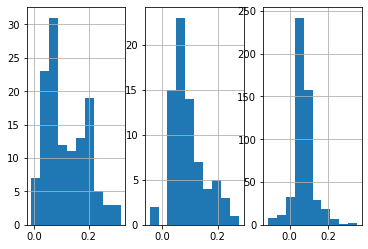

In [134]:
__, axs = plt.subplots(1,3)
moderni[(1946 < moderni.leto) & (moderni.leto < 1957)].razlika.hist(ax=axs[0])
moderni[(1980 < moderni.leto) & (moderni.leto < 1990)].razlika.hist(ax=axs[1])
moderni[(2000 < moderni.leto) & (moderni.leto < 2011)].razlika.hist(ax=axs[2])

## Avtorji

Za konec poglejmo še, kateri avtorji so napisali največ del v vzorcu ter kateri avtorji pišejo največ v eni stopici.

In [164]:
# opustimo avtorje, ki niso napisali skoraj nobenega dela
aktivni_avtorji = zanimivi.groupby(zanimivi.avtor).filter(lambda x: len(x) > 3)
st_del = aktivni_avtorji.groupby(aktivni_avtorji.avtor).size().sort_values()
st_del

avtor
Janez Nepomuk Primic      4
Franc Hubad               4
Josip Podmilšak           4
Mirko Javornik            4
Josip Lovrenčič           4
                       ... 
Ivan Cankar             205
Miran Jarc              209
Vera Albreht            263
anonimno                346
Tomaž Šalamun           637
Length: 418, dtype: int64

<AxesSubplot:>

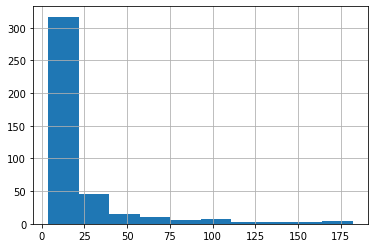

In [170]:
st_del[st_del < 200].hist()

Na Wikiviru ima 418 avtorjev objavljena 4 ali več dela.
Večina avtorjev ima objavljenih majhno število del, pod 25.
Najbolj zastopani so Ivan Cankar, Miran Jarc, Vera Albreht ter Tomaž Šalamun;
slednji ima objavljenih več kot 600 del. 

<AxesSubplot:>

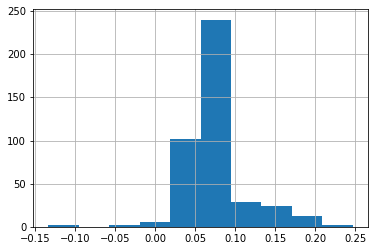

In [176]:
razlike = aktivni_avtorji.groupby(aktivni_avtorji.avtor).razlika.median().sort_values()
razlike.hist()

In [178]:
razlike.tail(10)

avtor
Jože Šerjak            0.181818
Engelbert Gangl        0.182609
Ljudmila Prunk-Utva    0.190476
Lili Novy              0.192420
Anton Funtek           0.194824
Igo Gruden             0.198020
Anton Tomaž Linhart    0.199632
Arkadij Videmšek       0.204082
Severin Šali           0.225000
Niko Grafenauer        0.247191
Name: razlika, dtype: float64

In [179]:
razlike.head(10)

avtor
Primož Trubar                -0.133333
Jurij Dalmatin               -0.102018
neznani avtor                -0.040816
Janko Glaser                 -0.038936
Ignacij Knoblehar            -0.015424
Eugène Scribe                -0.007692
Vojteh Kurnik                 0.000000
Matevž Ravnikar - Poženčan    0.017430
Jožef Orel                    0.018789
Oton Trabant                  0.019608
Name: razlika, dtype: float64

Večina avtorjev ima povprečno razliko v razmerju amfibraha in daktila med 0.05 in 0.1.
Avtor, ki največ piše v amfibrahu, je Niko Grafenauer.
Avtorja, ki sta največ pisala v daktilu sta Primož Trubar in Jurij Dalmatin; ker pa je analiza besedila iz njunega časa nezanesljiva, tega rezultata ne moramo upoštevati. 
Dela z največ daktila torej pripadajo avtorju Janku Glaserju.